In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

## Распределения и генерация выборки

### Для решения задачи принимаем распределение Парета

In [2]:
k = 3 # коэфициент кривизны
pareto = sts.pareto(k)
sample = pareto.rvs(1000) # генерим случайную выборку 1000 значений

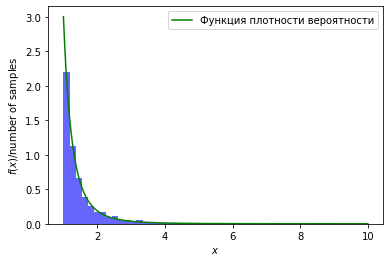

In [3]:
x = np.linspace(1,10,1000) # определяем массив точек для построения плотности распределения
pdf = pareto.pdf(x)#вычисляем значения плотности распределения от выборки
#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label='Функция плотности вероятности', color='green')
plt.hist(sample, bins =50, range=(1,10), density=True, color='blue', alpha=0.6)
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

## Оценка распределения выборочного среднего

In [13]:
xm = 1 #минимальное значение 
E = (xm*k)/(k-1)
D = (((xm)/(k-1))**2)*(k/(k-2))
print('{} - среднее значение, {} - дисперсия'.format(E, D))

1.5 - среднее значение, 0.75 - дисперсия


## Расчет для выборок c разными объемами

In [69]:
from scipy.stats import norm
def get_1000sample(n):
  samples = [pareto.rvs(n).mean() for i in range(1000)]
  mu, std = norm.fit(samples)
  plt.hist(samples, bins=25, density=True, alpha=0.6, color='b')
  # Теперь плотность.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  plt.plot(x, p, 'magenta', linewidth=4)
  title = 'Среднее значение = {}'.format(mu)
  plt.title(title)
  plt.show()

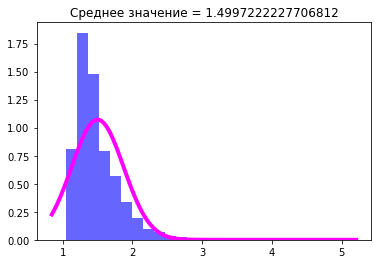

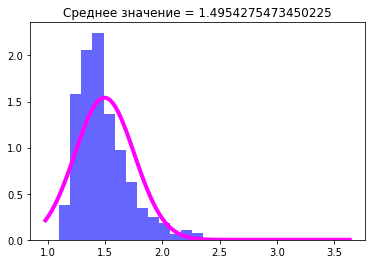

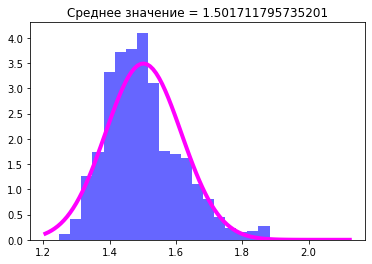

In [70]:
for n in [5, 10, 50]:
    get_1000sample(n)

## Вывод

Разница между полученными распределениями при увеличении n имеет минимальное изменение. Точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается.